<a href="https://colab.research.google.com/github/itsTIMUS/colab-projects/blob/main/ML/MNIST_handwrittenNumber_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [11]:
# loading mnist dataset
(x_train , y_train),(x_test , y_test) = mnist.load_data()

In [10]:
type(y_test)

numpy.ndarray

In [13]:
print(x_train.shape , y_train.shape , x_test.shape , y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
#traing data 60 000
#test data 10 000
# image dimensions 28 * 28 (gray scale)

In [14]:
#printing the 10 th image
print(x_train[10].shape)

(28, 28)


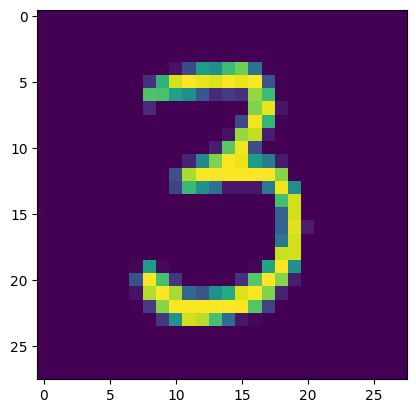

3


In [16]:
#displaying the image
plt.imshow(x_train[50])
plt.show()
print(y_train[50])

In [17]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [18]:
#unique values in y train
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
# we can use those labels as such or we can use oneHotEncoding
# all the images has same dimensions

In [19]:
#scaling the values (0,255)=>(0,1)
x_train = x_train/255
x_test = x_test/255

In [20]:
#building the neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),     # Input layer: 28,28 features
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),     # Hidden layer: 50 units, ReLU activation
    keras.layers.Dense(10, activation='sigmoid')    # Output layer: 2 units, sigmoid activation
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
#compiling the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
#training the model
history = model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8430 - loss: 0.5170
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9563 - loss: 0.1490
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9685 - loss: 0.1056
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9749 - loss: 0.0824
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9798 - loss: 0.0656
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9839 - loss: 0.0528
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9863 - loss: 0.0447
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9878 - loss: 0.0399
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9892 - loss: 0.0338
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9906 - loss: 0.0297


In [23]:
# accuracy on modle test
loss , accuracy = model.evaluate(x_test,y_test)
print('Test Accuracy:',accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9615 - loss: 0.1474
Test Accuracy: 0.9674000144004822


In [ ]:
# test data accuracy = 96.7  train data accuracy = 99.06

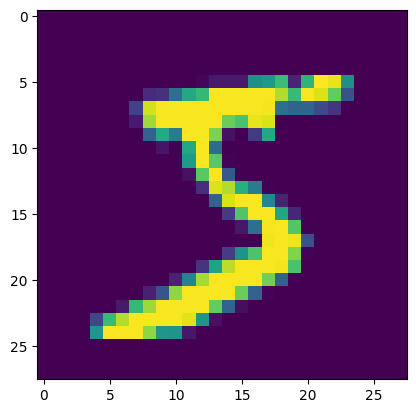

5


In [24]:
#displaying the image
plt.imshow(x_train[0])
plt.show()
print(y_train[0])

In [25]:
y_pred = model.predict(x_test)
print (y_pred.shape)
print (y_pred[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
(10000, 10)
[2.8585167e-05 1.8630335e-02 6.4586108e-03 8.0224198e-01 2.7595089e-08
 3.6762367e-04 1.4011194e-10 9.9999851e-01 1.0723879e-02 9.1704017e-01]


In [26]:
#converting the prediction probabilities  to class label
label_first_image = np.argmax(y_pred[0])
print(label_first_image)

7


In [27]:
# converting the prediction probabilities to class label for all test data points
y_pred_label = [np.argmax(i) for i in y_pred]
print(y_pred_label)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(6), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(3), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(5), np.int64(7), np.int64(2), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

In [28]:
conf_mat = confusion_matrix(y_test,y_pred_label)
print(conf_mat)

tf.Tensor(
[[ 955    0    2    3    5    6    2    4    2    1]
 [   0 1122    2    4    0    0    2    1    4    0]
 [   1    0 1005    9    2    0    4    4    7    0]
 [   1    1    2  990    0    7    0    5    2    2]
 [   0    0    0    0  977    0    2    2    1    0]
 [   4    0    0   13    4  862    4    3    1    1]
 [   4    3    0    1    7   10  932    0    1    0]
 [   1    3   10    2    8    0    0  995    2    7]
 [   2    2   11   26    7    9    4    5  905    3]
 [   2    3    0    9   49    4    0    9    4  929]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

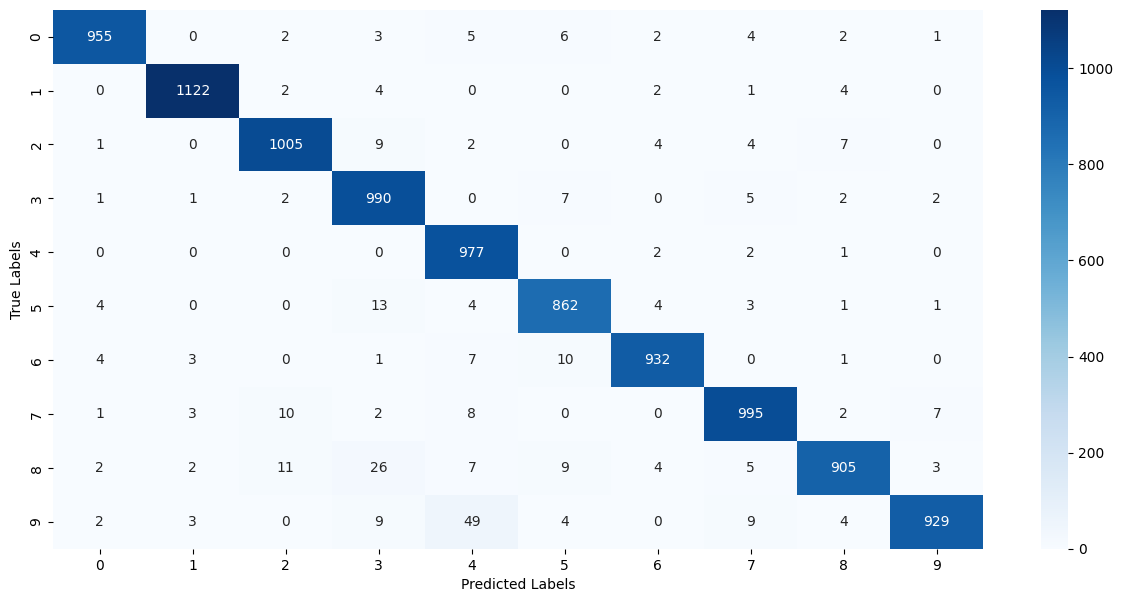

In [29]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [41]:
#building a predictive system
input_image_path = '/content/5.jpg'
input_image = cv2.imread(input_image_path)

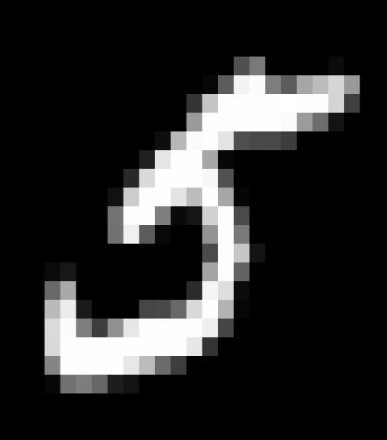

In [42]:
cv2_imshow(input_image)

In [43]:
input_image.shape

(440, 387, 3)

In [44]:
grayscale = cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)
input_image_resize = cv2.resize(grayscale,(28,28))
input_image_resize = input_image_resize/255
input_image_reshape = np.reshape(input_image_resize,[1,28,28])
input_image_reshape.shape

(1, 28, 28)

In [45]:
input_prediction = model.predict(input_image_reshape)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[3.6307855e-09 9.3150692e-04 7.7966234e-04 9.9999952e-01 6.1939833e-14
  1.0000000e+00 2.4826693e-06 6.9245553e-15 1.4855796e-02 5.2665591e-06]]


In [39]:
input_prediction_label = [np.argmax(input_prediction)]
print(input_prediction_label)

[np.int64(2)]


In [40]:
#predictive system
input_image_path = input('path to the image to be prdicted')
input_image = cv2.imread(input_image_path)
grayscale = cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)
input_image_resize = cv2.resize(grayscale,(28,28))
input_image_resize = input_image_resize/255
input_image_reshape = np.reshape(input_image_resize,[1,28,28])
input_prediction = model.predict(input_image_reshape)
input_prediction_label = [np.argmax(input_prediction)]
print(input_prediction_label)

path to the image to be prdicted/content/5.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[np.int64(5)]
